# Airbnb Listing Analysis

**Objective 1: Data Preparation & QA**

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Dataset
listings = pd.read_csv(
        'Airbnb/Listings.csv', 
        encoding="ISO-8859-1", 
        low_memory=False,
        parse_dates=['host_since']
)

In [5]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [11]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [8]:
# Convert host_since column into datetime
listings['host_since'] = pd.to_datetime(listings['host_since'])

In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [15]:
# Filter the data where city is Paris and keep only the columns 'host_since','neighbourhood','City','accomdates','price'

paris_listings = (
        listings
        .query("city == 'Paris'")
        .loc[:,['host_since','neighbourhood','city','accommodates','price']]
)
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [17]:
# Show the sum of missing vales for each column
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [18]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [22]:
paris_listings.query("accommodates == 0 and price == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

**Objective 2: Prepare for Visualization** 
* Create a DataFrame called **paris_listings_neighbourhood**. Group the Paris listings by **neighbourhood** and calculate the average price for each. Sort by price in ascending order.
* Create a DataFrame called **paris_listings_accomodations**. Filter your data down to the most expensive neighbourhood in Paris. Group it by **accommodates** and calculate the average price for each. Sort by price in ascending order.
* Finally, create a DataFrame called **paris_listings_over_time**. Group the data by the year component of **host_since**. Calculate a count of rows to get the number of new hosts for each year, and the average price of listings for each year.

In [29]:
paris_listings_neighbourhood = (
        paris_listings
        .groupby('neighbourhood')
        .agg({'price':'mean'})
        .sort_values('price')
)
paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [32]:
paris_listings_accomdations = (
            paris_listings
            .query("neighbourhood == 'Elysee'")
            .groupby('accommodates')
            .agg({'price':'mean'})
            .sort_values('price')
)
paris_listings_accomdations.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [33]:
paris_listings_accomdations = (
            paris_listings
            .query("neighbourhood == 'Elysee'")
            .groupby('accommodates')
            .agg({'price':'mean','neighbourhood':'count'})
            .sort_values('price')
)
paris_listings_accomdations.head()

,price,neighbourhood
accommodates,,
0,0.000000,6
1,79.522222,90
3,152.828767,146
2,155.103352,716
4,212.096070,458


In [41]:
paris_listings_over_time = (
        paris_listings
        .set_index('host_since')
        .resample('Y')
        .agg({
                'neighbourhood':'count',
                'price':'mean'
            })
)
paris_listings_over_time.head()    

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


**Objective 3: Visualize the Data**
* Build a horizontal bar chart of average rent price by neighborhood. Which neighbourhoods stand out?
* Build a horizontal bar chart of average price by accomodates in the most expensive neighbourhood. Are the results intuitive?
* Finally, build line charts of new hosts per year and average price by year. **What happened to new hosts in 2015? Was average price impacted?**
* Plot both time series in a dual axis line chart!

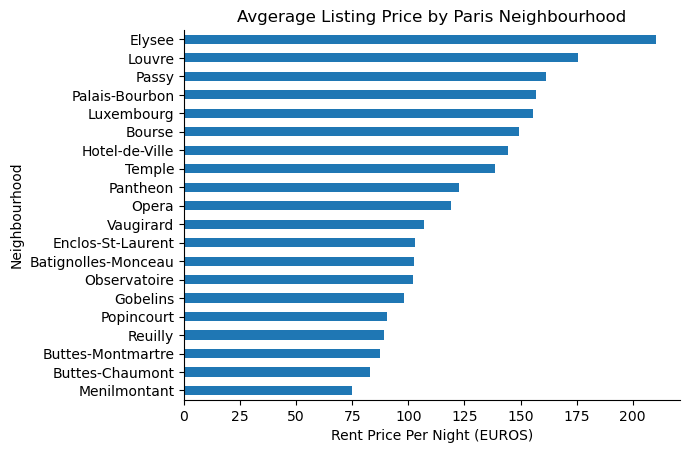

In [59]:
# Horizontal bar chart of Average Rent Price by Neighborhood
(paris_listings_neighbourhood
    .plot
    .barh(
        title = 'Avgerage Listing Price by Paris Neighbourhood',
        xlabel = 'Rent Price Per Night (EUROS)',
        ylabel = 'Neighbourhood',
        legend = None
    )
)
sns.despine()

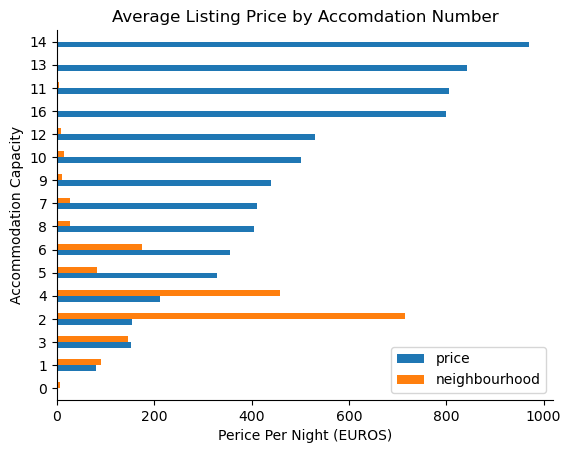

In [65]:
# Horizontal bar chart of Average Price by Accomodates in the most expensive neighbourhood
(paris_listings_accomdations
     .plot
     .barh(
         title = 'Average Listing Price by Accomdation Number',
         xlabel = 'Perice Per Night (EUROS)',
         ylabel = 'Accommodation Capacity'
     )
    
)
sns.despine()

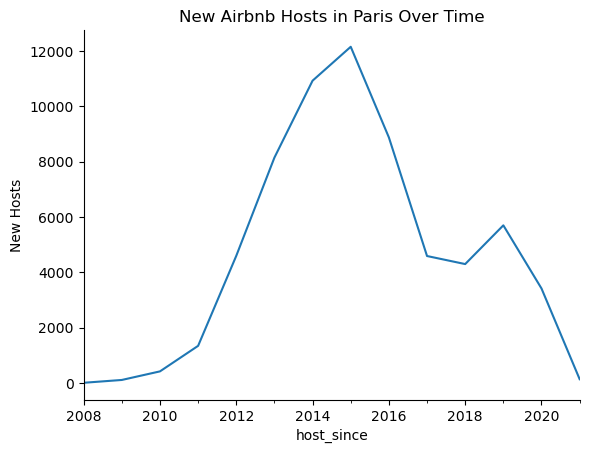

In [70]:
# Line Charts of New Hosts Per Year
paris_listings_over_time['neighbourhood'].plot(
    ylabel = 'New Hosts',
    title = 'New Airbnb Hosts in Paris Over Time'
)
sns.despine()

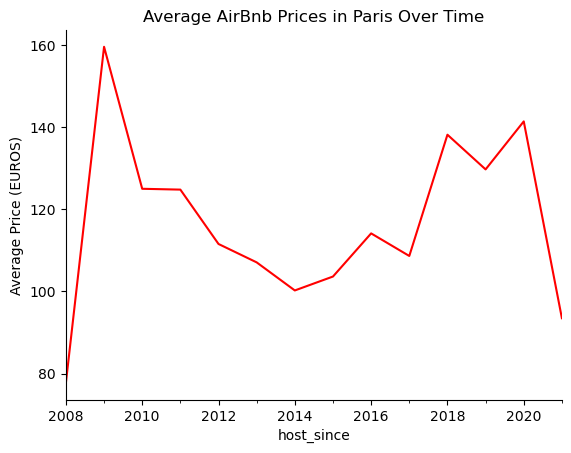

In [72]:
# Line Charts of Average Price by Year
paris_listings_over_time['price'].plot(
    ylabel = 'Average Price (EUROS)',
    title = 'Average AirBnb Prices in Paris Over Time',
    color='red'
)
sns.despine()

(0.0, 163.73608490566036)

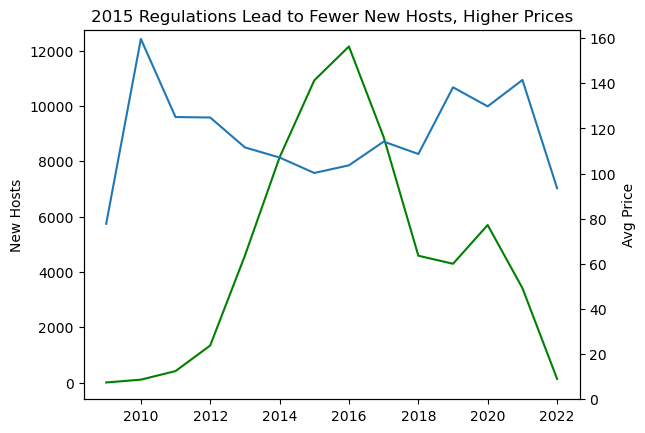

In [82]:
# Plot both Time Series in a dual axis line chart
fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['neighbourhood'],
    label = 'New Hosts',
    c='Green'
)
ax.set_ylabel('New Hosts')
ax.set_title('2015 Regulations Lead to Fewer New Hosts, Higher Prices')

ax2 = ax.twinx()
ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['price'],
    label = 'Avg Price'
)
ax2.set_ylabel('Avg Price')
ax2.set_ylim(0)